# Лабораторная работа № 4
# Выполнил Угарин Никита Александрович

Используя датасет "Пассажиры автобуса", создайте нейронную сеть для решения задачи классификации пассажиров на входящих и выходящих.

Добейтесь точности работы модели выше 90% на проверочной выборке

### Загрузка данных


In [63]:
# загрузка библиотек

# методы для отрисовки изображений
from PIL import Image

# Для отрисовки графиков
import matplotlib.pyplot as plt

# Для генерации случайных чисел
import random

# Библиотека работы с массивами
import numpy as np

# Для работы с файлами
import os

# импортируем модуль для загрузки данных
import gdown

# для разделения выборок
from sklearn.model_selection import train_test_split

# для создания сети
from tensorflow.keras.models import Sequential

# для создания слоев
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

# для работы с изображениями
from tensorflow.keras.preprocessing import image

# оптимизатор
from tensorflow.keras.optimizers import Adam

# модуль для отсчета времени
import time

In [64]:
IMAGE_PATH = 'bus'  # если папка 'bus' находится в той же директории, что и ваш ноутбук
print(os.listdir(IMAGE_PATH))

# Получение списка папок, находящемуся по адресу в скобках
os.listdir(IMAGE_PATH)

['Входящий', 'Выходящий']


['Входящий', 'Выходящий']

In [65]:
# Определение списка имен классов
CLASS_LIST = sorted(os.listdir(IMAGE_PATH))

# Определение количества классов
CLASS_COUNT = len(CLASS_LIST)

# Проверка результата
print(f'Количество классов: {CLASS_COUNT}, метки классов: {CLASS_LIST}')

Количество классов: 2, метки классов: ['Входящий', 'Выходящий']


In [66]:
# Получения списка файлов для каждого класса

for cls in CLASS_LIST:
    path = os.path.join(IMAGE_PATH, cls)
    print(cls, ':', os.listdir(path))

Входящий : ['00000.jpg', '00001.jpg', '00002.jpg', '00003.jpg', '00004.jpg', '00005.jpg', '00006.jpg', '00007.jpg', '00008.jpg', '00009.jpg', '00010.jpg', '00011.jpg', '00012.jpg', '00013.jpg', '00014.jpg', '00015.jpg', '00016.jpg', '00017.jpg', '00018.jpg', '00019.jpg', '00020.jpg', '00021.jpg', '00022.jpg', '00023.jpg', '00024.jpg', '00025.jpg', '00026.jpg', '00027.jpg', '00028.jpg', '00029.jpg', '00030.jpg', '00031.jpg', '00032.jpg', '00033.jpg', '00034.jpg', '00035.jpg', '00036.jpg', '00037.jpg', '00038.jpg', '00039.jpg', '00040.jpg', '00041.jpg', '00042.jpg', '00043.jpg', '00044.jpg', '00045.jpg', '00046.jpg', '00047.jpg', '00048.jpg', '00049.jpg', '00050.jpg', '00051.jpg', '00052.jpg', '00053.jpg', '00054.jpg', '00055.jpg', '00056.jpg', '00057.jpg', '00058.jpg', '00059.jpg', '00060.jpg', '00061.jpg', '00062.jpg', '00063.jpg', '00064.jpg', '00065.jpg', '00066.jpg', '00067.jpg', '00068.jpg', '00069.jpg', '00070.jpg', '00071.jpg', '00072.jpg', '00073.jpg', '00074.jpg', '00075.jpg', 

Отобразим визуально для примера по одному изображению из каждого класса (при помощи функции `.imshow()` из модуля `matplotlib.pyplot`):

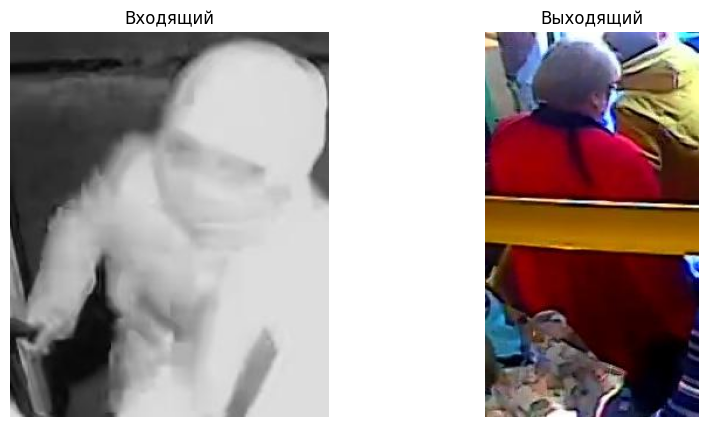

In [67]:
# Создание заготовки для изображений всех классов
fig, axs = plt.subplots(1, CLASS_COUNT, figsize=(10, 5))

# Для всех номеров классов:
for i in range(CLASS_COUNT):
    # Формирование пути к папке содержащего класса
    car_path = os.path.join(IMAGE_PATH, CLASS_LIST[i])
    # Выбор случайного фото из i-го класса
    img_path = os.path.join(car_path, random.choice(os.listdir(car_path)))
    # Отображение фотографии
    axs[i].set_title(CLASS_LIST[i])
    axs[i].imshow(Image.open(img_path))
    axs[i].axis('off')
    
plt.show()

In [68]:
data_files = []                           # Cписок путей к файлам картинок
data_labels = []                          # Список меток классов, соответствующих файлам

for class_label in range(CLASS_COUNT):    # Для всех классов по порядку номеров (их меток)
    class_name = CLASS_LIST[class_label]  # Выборка имени класса из списка имен
    class_path = os.path.join(IMAGE_PATH,class_name)  # Формирование полного пути к папке с изображениями класса
    class_files = os.listdir(class_path)  # Получение списка имен файлов с изображениями текущего класса
    print(f'Размер класса {class_name} составляет {len(class_files)} фото')

    # Добавление к общему списку всех файлов класса с добавлением родительского пути
    data_files += [f'{class_path}/{file_name}' for file_name in class_files]

    # Добавление к общему списку меток текущего класса - их ровно столько, сколько файлов в классе
    data_labels += [class_label] * len(class_files)

print()
print('Общий размер базы для обучения:', len(data_labels))

Размер класса Входящий составляет 6485 фото
Размер класса Выходящий составляет 2596 фото

Общий размер базы для обучения: 9081


## Создаем экземпляр модели

In [69]:
model = Sequential()

Добавим первый сверточный слой + BatchNormalization

In [70]:
model.add(Conv2D(8, (3, 3), padding='same', activation='relu', input_shape=(28, 56, 3)))

# слой для ускорения обучения
model.add(BatchNormalization())

model.summary()

c:\python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 28, 56, 8)      │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 56, 8)      │            32 │
│ (BatchNormalization)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 256 (1.00 KB)

 Trainable params: 240 (960.00 B)

 Non-trainable params: 16 (64.00 B)

Второй сверточный слой + BatchNormalization

In [71]:
model.add(Conv2D(5, (3, 2), strides = (2,3), padding='valid', activation='relu'))

# слой для ускорения обучения
model.add(BatchNormalization())

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 28, 56, 8)      │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 56, 8)      │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 13, 19, 5)      │           245 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 19, 5)      │            20 │
│ (BatchNormalization)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 521 (2.04 KB)

 Trainable params: 495 (1.93 KB)

 Non-trainable params: 26 (104.00 B)

Слой подвыборки + слой Dropout

In [72]:
model.add(MaxPooling2D(pool_size=(3, 3)))

# с помощью данного слоя я предотвращаю переобучение
model.add(Dropout(0.3))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 28, 56, 8)      │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 56, 8)      │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 13, 19, 5)      │           245 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 19, 5)      │            20 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 6, 5)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 6, 5)        │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 521 (2.04 KB)

 Trainable params: 495 (1.93 KB)

 Non-trainable params: 26 (104.00 B)

Слой преобразования многомерных данных в одномерные

In [73]:
model.add(Flatten())

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 28, 56, 8)      │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 56, 8)      │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 13, 19, 5)      │           245 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 19, 5)      │            20 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 6, 5)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 6, 5)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 120)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 521 (2.04 KB)

 Trainable params: 495 (1.93 KB)

 Non-trainable params: 26 (104.00 B)

Последний выходной слой

In [74]:
model.add(Dense(32, activation='relu'))

# с помощью данного слоя я предотвращаю переобучение снова
model.add(Dropout(0.3))

model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 28, 56, 8)      │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 56, 8)      │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 13, 19, 5)      │           245 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 19, 5)      │            20 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 6, 5)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 6, 5)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         3,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,459 (17.42 KB)

 Trainable params: 4,433 (17.32 KB)

 Non-trainable params: 26 (104.00 B)

1. Загрузка и подготовка данных

In [75]:
from tensorflow.keras.utils import to_categorical

X = []
y = []
for img_path, label in zip(data_files, data_labels):
    img = Image.open(img_path).resize((56, 28))  # (ширина, высота)
    img = np.array(img) / 255.0  # нормализация
    X.append(img)
    y.append(label)
X = np.array(X)
y = to_categorical(y, num_classes=2)

2. Разделение на train/test


In [76]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

3. Компиляция модели

In [77]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

4. Обучение

In [78]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6419 - loss: 0.8654 - val_accuracy: 0.6500 - val_loss: 0.6340
Epoch 2/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7376 - loss: 0.5341 - val_accuracy: 0.7639 - val_loss: 0.5038
Epoch 3/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7685 - loss: 0.5009 - val_accuracy: 0.8057 - val_loss: 0.4228
Epoch 4/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7856 - loss: 0.4611 - val_accuracy: 0.8217 - val_loss: 0.3960
Epoch 5/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7931 - loss: 0.4453 - val_accuracy: 0.8266 - val_loss: 0.3673
Epoch 6/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8023 - loss: 0.4217 - val_accuracy: 0.8415 - val_loss: 0.3544
Epoch 7/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8014 - loss: 0.4252 - val_accuracy: 0.8448 - val_loss: 0.3449
Epoch 8/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8107 - loss: 0.3983 - val_accuracy: 0.

5. Оценка

In [79]:
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f'Точность на проверочной выборке: {val_acc*100:.2f}%')

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8988 - loss: 0.2234
Точность на проверочной выборке: 90.04%


## Я смог достичь точности в 90%, для этого мне пришлось добавить дважды слой Dropout (он помогает предотвратить переобучение модели), также я добавил слой BatchNormalization (он выполняет стандартизацию выходов из предыдущего слоя) и еще я сделал количество эпох в обечнии = 20 (10 и 15 мне не хватало) + я добавил Dense используя функцию активации - Relu.